# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [10]:
print(type(diabetes))
print('----------')
print(diabetes.keys())
print('----------')
print(diabetes.DESCR)
print('----------')
print(diabetes.feature_names)
print('----------')
print(diabetes.target)

<class 'sklearn.utils._bunch.Bunch'>
----------
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
----------
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tc

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [12]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [14]:
print("Информация о типах данных:")
print(df.info())

print("\nКатегориальные признаки:")
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns.tolist() if len(categorical_columns) > 0 else "Нет")

print("\nЗначения (null):")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "Нет")

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Категориальные признаки:
Нет

Значения (null):
Нет


## Исследование данных

4. Постройте матрицу корреляции.

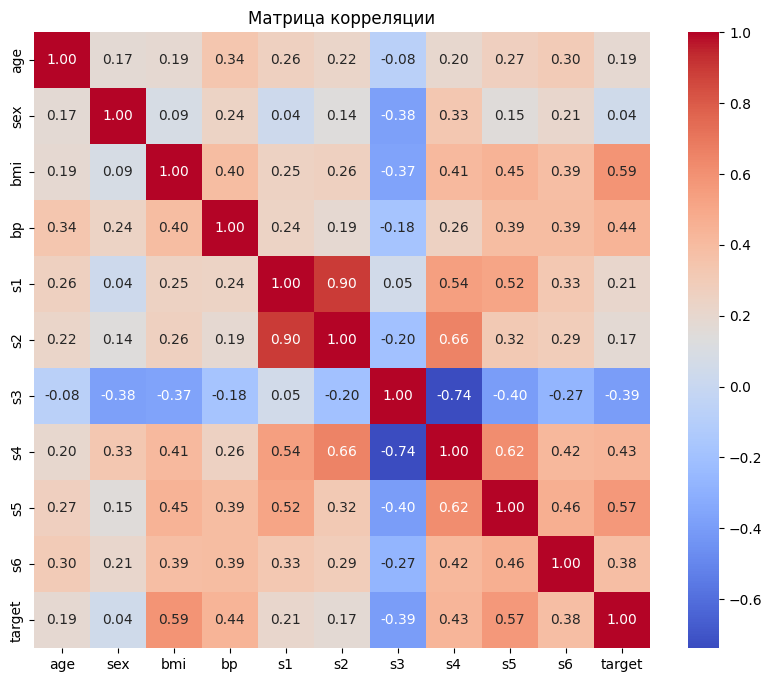

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

In [20]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Матрица корреляции')
plt.show()

print(corr_matrix)

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

Признак с наибольшей корреляцией: bmi (r = 0.586)


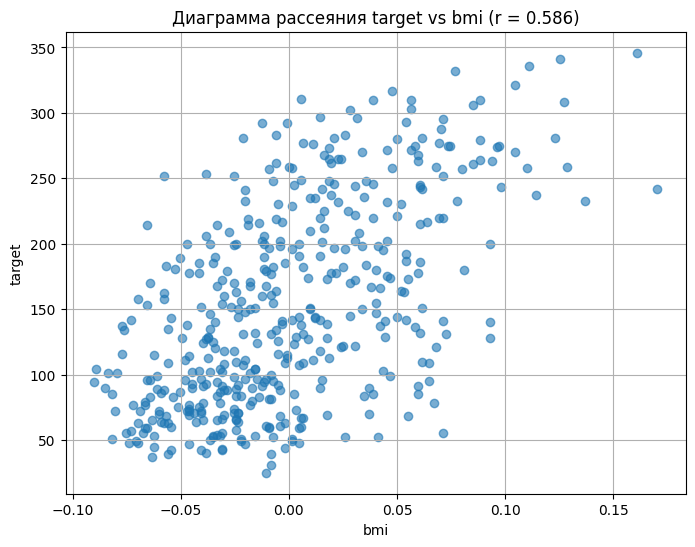

In [21]:
correlations = df.corr()['target'].drop('target')

max_corr_feature = correlations.abs().idxmax()
max_corr_value = correlations[max_corr_feature]

plt.figure(figsize=(8, 6))
plt.scatter(df[max_corr_feature], df['target'], alpha=0.6)
plt.xlabel(max_corr_feature)
plt.ylabel('target')
plt.title(f'Диаграмма рассеяния target vs {max_corr_feature} (r = {max_corr_value:.3f})')
plt.grid(True)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [24]:
correlations = df.corr()['target'].drop('target')

top_5_features = correlations.abs().nlargest(5).index
print("5 признаков с самым высоким коэффициентом корреляции с целевым значением:")
for feature in top_5_features:
    print(f"{feature}: {correlations[feature]:.3f}")

X = df[top_5_features]
y = df['target']

print("\nX:", X.shape)
print("y:", y.shape)

5 признаков с самым высоким коэффициентом корреляции с целевым значением:
bmi: 0.586
s5: 0.566
bp: 0.441
s4: 0.430
s3: -0.395

X: (442, 5)
y: (442,)


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

8. Выполните обучение модели.

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Root Mean Squared Error (RMSE): 53.785


10. Расчитайте R² (коэффициент детерминации)

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"Коэффициент детерминации (R²): {r2:.3f}")

Коэффициент детерминации (R²): 0.477


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?